In this notebook, we will go through some of the basic API building blocks in fastaudio that you can use including:


* Loading Audio
* Preprocess audio by removing the silence and resampling
* Apply transforms directly over audio signal like random croping, shifting or adding noise
* Transform spectrograms with time and frequency masking (SpecAugment), calculate Delta

To access all of the transforms available, you only need one import:

In [2]:
from fastaudio.augment.all import *

In [3]:
from fastaudio.core.all import *
from fastai.data.all import *

We can load a test dataset using the untar_data method from fastai

In [ ]:
speakers = untar_data(URLs.SAMPLE_SPEAKERS10)
speakers = speakers.ls()
speakers[0]

Then we can create and audio tensor which we can view and listen to using the `show()` method

<AxesSubplot:>

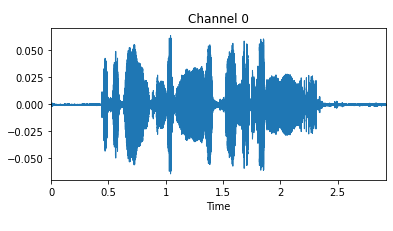

In [25]:
audio = AudioTensor.create(speakers[0])
audio.show()

If we want to see what the spectrogram for that looks like, we can create a AudioToSpec Transformer:

/home/harry/miniconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/harry/miniconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


<AxesSubplot:>

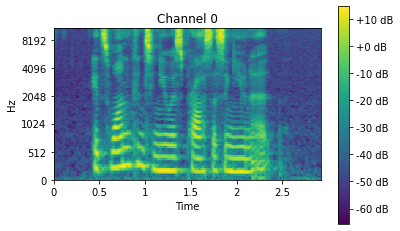

In [27]:
spectrogram = AudioToSpec.from_cfg(AudioConfig.Voice())(audio)
spectrogram.show()

Now lets go through some of the built in augmentations that we have in the library.

The silence can be easily removed

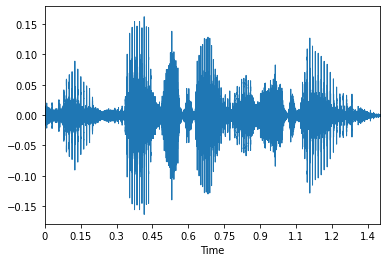

In [ ]:
tfm = RemoveSilence()
tfm(audio).show()

Or else you can crop the first 500 ms

<AxesSubplot:>

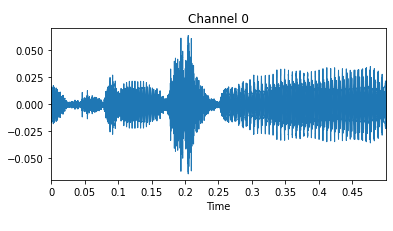

In [29]:
tfm = ResizeSignal(duration=500)
tfm(audio).show()

Now with the spectrogram

Masking is easy

/home/harry/miniconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/harry/miniconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


<AxesSubplot:>

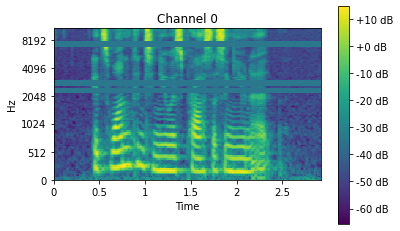

In [30]:
tfm = MaskFreq(num_masks=3, size=5)
tfm(spectrogram).show()

And you can compose multiple transforms using Pipeline from fastai

<AxesSubplot:>

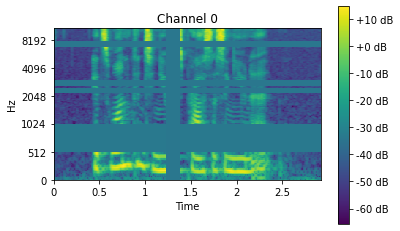

In [31]:
from fastcore.transform import Pipeline

tfms = Pipeline([MaskFreq(), MaskTime()])
tfms(spectrogram).show()

For examples of loading a dataset and training. Check out the tutorial notebooks